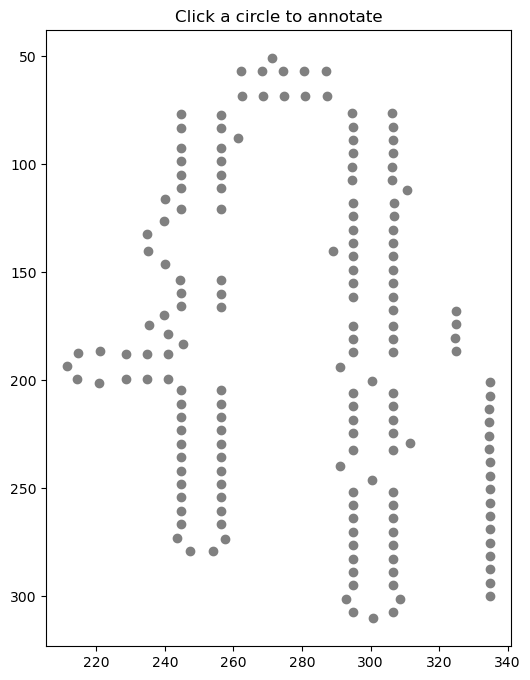

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

circle_df = pd.read_csv('p4p6_circle_coordinates.csv')

# Load the coordinates
df = circle_df.copy()

fig, ax = plt.subplots(figsize=(6, 8))
sc = ax.scatter(df['cx'], df['cy'], color='gray')

ax.set_title("Click a circle to annotate")
ax.invert_yaxis()  # SVG coordinates have origin at top-left

annotations = []

def on_click(event):
    # Find the nearest point
    if event.inaxes != ax:
        return

    x_click, y_click = event.xdata, event.ydata
    distances = ((df['cx'] - x_click)**2 + (df['cy'] - y_click)**2).pow(0.5)
    nearest_idx = distances.idxmin()
    point = df.loc[nearest_idx]

    # Ask user for annotation (in Jupyter, use input())
    pos = input(f"Type label for point at ({point.cx}, {point.cy}): ")
    if pos:
        ax.annotate(pos, (point.cx, point.cy), textcoords="offset points", xytext=(5,5), ha='left', fontsize=8, color='blue')
        annotations.append((nearest_idx, pos))
        fig.canvas.draw()

cid = fig.canvas.mpl_connect('button_press_event', on_click)
plt.show()

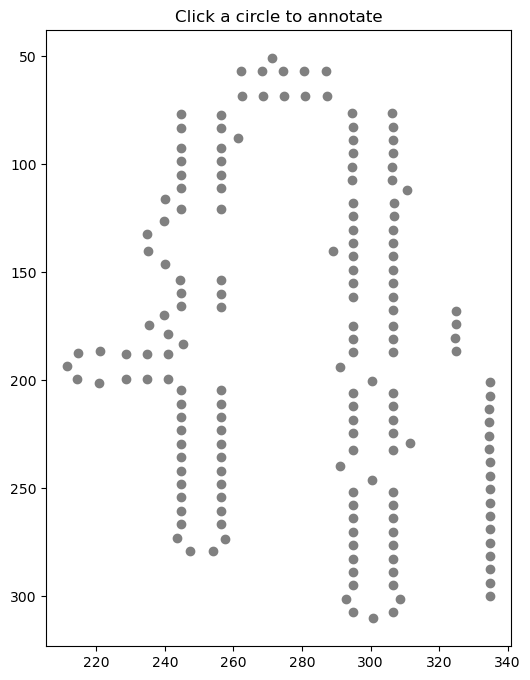

In [2]:
import matplotlib.pyplot as plt
from ipywidgets import Text, Button, HBox, VBox, Output
import pandas as pd

# Use the loaded circle_df
df = circle_df.copy()

# Set up plot
fig, ax = plt.subplots(figsize=(6, 8))
sc = ax.scatter(df['cx'], df['cy'], color='gray')
ax.set_title("Click a circle to annotate")
ax.invert_yaxis()

# Set up widget elements
text_input = Text(description="Label:")
submit_button = Button(description="Submit")
out = Output()

# Store annotations
annotations = {}
selected_idx = [None]

def on_click(event):
    if event.inaxes != ax:
        return
    x_click, y_click = event.xdata, event.ydata
    distances = ((df['cx'] - x_click)**2 + (df['cy'] - y_click)**2).pow(0.5)
    idx = distances.idxmin()
    selected_idx[0] = idx
    with out:
        out.clear_output()
        print(f"Selected point at ({df.loc[idx, 'cx']:.2f}, {df.loc[idx, 'cy']:.2f})")

def on_submit(b):
    idx = selected_idx[0]
    label = text_input.value.strip()
    if idx is not None and label:
        point = df.loc[idx]
        ax.annotate(label, (point.cx, point.cy), textcoords="offset points", xytext=(5,5), fontsize=8, color='blue')
        annotations[idx] = label
        fig.canvas.draw()
        with out:
            print(f"Annotated point {idx} as '{label}'")

fig.canvas.mpl_connect('button_press_event', on_click)
submit_button.on_click(on_submit)

# Display interface
VBox([HBox([text_input, submit_button]), out])